In [48]:
import random
import matplotlib.pyplot as plt


class TicTacToe:
    def __init__(self):
        self.board = [' ' for _ in range(9)]  # Пустая доска
        self.value_table = {}  # Таблица ценностей состояний
        self.generate_value_table()  # Генерация таблицы ценностей

    def check_winner(self):
        # Проверка всех возможных выигрышных комбинаций
        winning_combinations = [
            [0, 1, 2], [3, 4, 5], [6, 7, 8],  # Горизонтали
            [0, 3, 6], [1, 4, 7], [2, 5, 8],  # Вертикали
            [0, 4, 8], [2, 4, 6]  # Диагонали
        ]
        for combo in winning_combinations:
            if self.board[combo[0]] == self.board[combo[1]] == self.board[combo[2]] != ' ':
                return self.board[combo[0]]
        if ' ' not in self.board:
            return 'Draw'  # Ничья
        # Игра продолжается

    def evaluate_state(self):
        winner = self.check_winner()
        if winner == 'X':
            return 1  # Выигрыш для 'X'
        elif winner == 'O':
            return 0  # Проигрыш для 'X'
        elif winner == 'Draw':
            return 0.5  # Ничья
        # Игра продолжается

    def get_available_moves(self):
        return [i for i, spot in enumerate(self.board) if spot == ' ']

    def make_move(self, position, player):
        self.board[position] = player

    def undo_move(self, position):
        self.board[position] = ' '

    def generate_value_table(self):
        # Генерация таблицы ценностей для всех возможных состояний
        self._generate_value_table_recursive('X')

    def _generate_value_table_recursive(self, player):
        state_key = ''.join(self.board)
        if state_key in self.value_table:
            return  # Состояние уже оценено

        if (value := self.evaluate_state()) is not None:
            self.value_table[state_key] = value
            return

        for move in self.get_available_moves():
            self.make_move(move, player)
            next_player = 'O' if player == 'X' else 'X'
            self._generate_value_table_recursive(next_player)
            self.undo_move(move)

        # Если состояние не закончилось, назначаем ценность 0.5
        if state_key not in self.value_table:
            self.value_table[state_key] = 0.5

    def print_value_table(self):
        for state, value in self.value_table.items():
            formatted_state = self.format_state(state)
            print(f"State:\n{formatted_state} -> Value: {value}\n")

    def format_state(self, state):
        """Форматирует состояние доски в виде 3x3 сетки."""
        return '\n-----\n'.join(['|'.join(state[i:i + 3]) for i in range(0, 9, 3)])

    def plot_value_distribution(self):
        # Подсчет количества состояний с каждой ценностью
        value_counts = {0: 0, 0.5: 0, 1: 0}

        for value in self.value_table.values():
            value_counts[value] += 1

        # Построение графика
        plt.figure(figsize=(10, 5))
        plt.bar(value_counts.keys(), value_counts.values(), width=0.1, align='center')
        plt.title('Distribution of State Values in Tic Tac Toe')
        plt.xlabel('State Value')
        plt.ylabel('Number of States')
        plt.xticks([0, 0.5, 1])
        plt.grid(axis='y')
        plt.show()

    def plot_wins_losses(self, num_games=100):
        wins = 0
        losses = 0
        draws = 0

        for _ in range(num_games):
            self.board = [' ' for _ in range(9)]  # Сброс доски
            while True:
                # Ход игрока 'X'
                if available_moves := self.get_available_moves():
                    move = random.choice(available_moves)
                    self.make_move(move, 'X')
                    if self.check_winner() == 'X':
                        wins += 1
                        break
                    elif ' ' not in self.board:
                        draws += 1
                        break

                if available_moves := self.get_available_moves():
                    move = random.choice(available_moves)
                    self.make_move(move, 'O')
                    if self.check_winner() == 'O':
                        losses += 1
                        break

        plt.figure(figsize=(10, 5))
        plt.bar(['Wins', 'Losses', 'Draws'], [wins, losses, draws], color=['green', 'red', 'blue'])
        plt.title('Wins, Losses, and Draws After Simulations')
        plt.ylabel('Number of Games')
        plt.grid(axis='y')
        plt.show()


# Пример использования
game = TicTacToe()
game.print_value_table()


State:
X|O|X
-----
O|X|O
-----
X| |  -> Value: 1

State:
X|O|X
-----
O|X|O
-----
O|X|X -> Value: 1

State:
X|O|X
-----
O|X|O
-----
O|X|  -> Value: 0.5

State:
X|O|X
-----
O|X|O
-----
X|X|O -> Value: 1

State:
X|O|X
-----
O|X|O
-----
 |X|O -> Value: 0.5

State:
X|O|X
-----
O|X|O
-----
 |X|  -> Value: 0.5

State:
X|O|X
-----
O|X|O
-----
 | |X -> Value: 1

State:
X|O|X
-----
O|X|O
-----
 | |  -> Value: 0.5

State:
X|O|X
-----
O|X|X
-----
O|O|X -> Value: 1

State:
X|O|X
-----
O|X|X
-----
O|O|  -> Value: 0.5

State:
X|O|X
-----
O|X|X
-----
O|X|O -> Value: 0.5

State:
X|O|X
-----
O|X|X
-----
O| |O -> Value: 0.5

State:
X|O|X
-----
O|X|X
-----
O| |  -> Value: 0.5

State:
X|O|X
-----
O|X| 
-----
O|X|O -> Value: 0.5

State:
X|O|X
-----
O|X| 
-----
O|X|  -> Value: 0.5

State:
X|O|X
-----
O|X| 
-----
O| |X -> Value: 1

State:
X|O|X
-----
O|X| 
-----
O| |  -> Value: 0.5

State:
X|O|X
-----
O|X|X
-----
X|O|O -> Value: 1

State:
X|O|X
-----
O|X|X
-----
 |O|O -> Value: 0.5

State:
X|O|X
-----
O|X|X
-

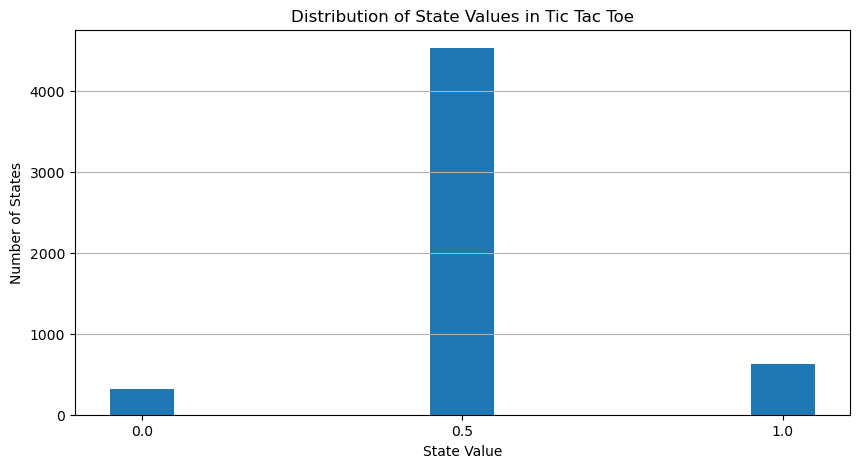

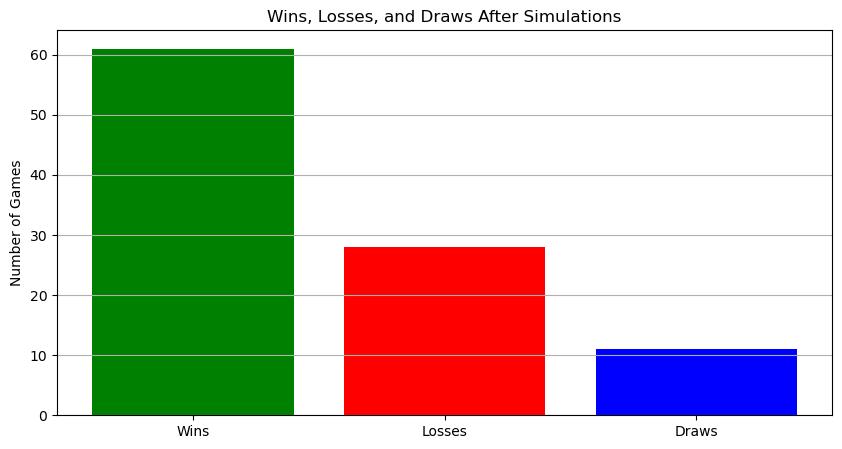

In [49]:
game.plot_value_distribution()
game.plot_wins_losses(num_games=100)